In [3]:
import numpy as np
import matplotlib.pyplot as plt
from cardiac_ml_tools import get_standard_leads, get_activation_time
import joblib
from tensorflow.keras.models import load_model

In [9]:
import pandas as pd

# Load ECG dataset sample
ecg_data = pd.read_csv('ecg_dataset/ptbdb_abnormal.csv')

# Convert to numpy array if needed
x_sample = ecg_data.iloc[0, :-1].values  # Assuming the last column is the label


In [37]:
import joblib
import numpy as np
import pandas as pd  # Make sure to import pandas

# Load ECG dataset sample
ecg_data = pd.read_csv('ecg_dataset/ptbdb_abnormal.csv')

# Define X_train and y_train (this depends on how your data is structured)
# X_train: Features (ECG samples)
# y_train: Labels (0 for Normal, 1 for Abnormal)

X_train = ecg_data.iloc[:, :-1].values  # All columns except the last one (assuming the last column is the label)
y_train = ecg_data.iloc[:, -1].values   # The last column is the label (Normal=0, Abnormal=1)

# Train the classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Save the trained model
joblib.dump(clf, 'model_classifier.pkl')


['model_classifier.pkl']

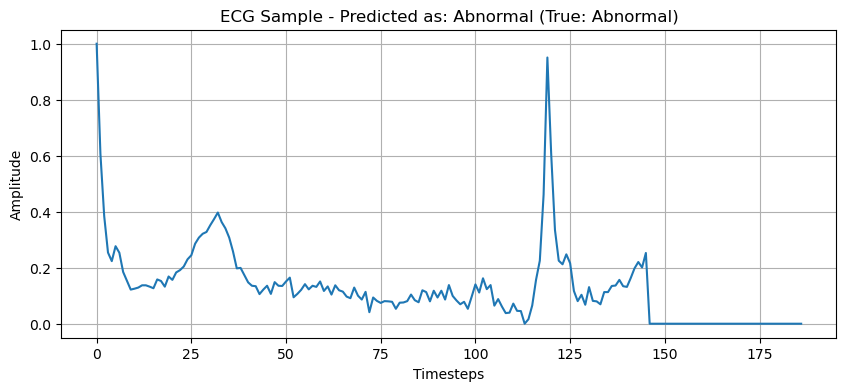

In [39]:
import numpy as np
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Load the trained model
clf = joblib.load('model_classifier.pkl')

# Load ECG data
ecg_data = pd.read_csv('ecg_dataset/ptbdb_abnormal.csv').values

# Pick one sample to test (you can change the index)
x_sample = ecg_data[0][:-1].reshape(1, -1)  # Extract features
true_label = int(ecg_data[0][-1])  # Optional: actual label for verification

# Make prediction
pred = clf.predict(x_sample)
pred_class = 'Abnormal' if pred[0] == 1 else 'Normal'

# Visualize the ECG sample
plt.figure(figsize=(10, 4))
plt.plot(x_sample.flatten())
plt.title(f'ECG Sample - Predicted as: {pred_class} (True: {"Abnormal" if true_label == 1 else "Normal"})')
plt.xlabel('Timesteps')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from cardiac_ml_tools import get_standard_leads, get_activation_time

# ------------------------------------
# Load Intracardiac Data
# ------------------------------------
case = 213  # You can change this to other available case numbers

# Load and process pECG
pECGData = np.load(f'intracardiac_dataset/{case}_pECG.npy')
pECGData = get_standard_leads(pECGData)

# Load Vm data
VmData = np.load(f'intracardiac_dataset/{case}_Vm.npy')

# Compute activation map from Vm
ActTime = get_activation_time(VmData)

# ------------------------------------
# Plot 12-Lead ECG
# ------------------------------------
row, column = 3, 4
num_timesteps = 500  # Number of time points to plot
titles = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]
reorder = {1:1,2:5,3:9,4:2,5:6,6:10,7:3,8:7,9:11,10:4,11:8,12:12}

plt.figure(figsize=(10, 7))
for i in range(pECGData.shape[1]):
    plt.subplot(row, column, reorder[i + 1])
    plt.plot(pECGData[0:num_timesteps, i], 'r')
    plt.title(titles[i])
    plt.grid(True)
    plt.xlabel('msec')
    plt.ylabel('mV')
plt.tight_layout()
plt.show()

# ------------------------------------
# Plot Activation Map and Vm Matrix
# ------------------------------------
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(pECGData.T, cmap='jet', aspect='auto')
plt.title('pECGData')

plt.subplot(1, 3, 2)
plt.text(0.5, 0.5, '-------->', fontsize=40, ha='center', va='center')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(VmData.T, cmap='jet', aspect='auto')
plt.title('VmData')
plt.xticks([])
plt.show()
